In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_excel(r'D:\LIJITH FILES\iris.xls')

In [14]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data.shape

(150, 5)

In [17]:
data.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [18]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [20]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [27]:
num_cols = data[['SL', 'SW', 'PL', 'PW']]

In [28]:
num_cols.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
num_cols.isna().sum()

SL    7
SW    6
PL    6
PW    0
dtype: int64

In [41]:
for i in ['SL', 'SW', 'PL', 'PW']:
        data[i] = data[i].fillna(data[i].median())

In [42]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [43]:
data1 = pd.read_excel(r'D:\LIJITH FILES\iris.xls')

In [44]:
data1.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [47]:
for i in ['SL', 'SW', 'PL', 'PW']:
        data1[i] = data1[i].fillna(data1[i].median())

In [48]:
data1.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'Boxpot for SL')

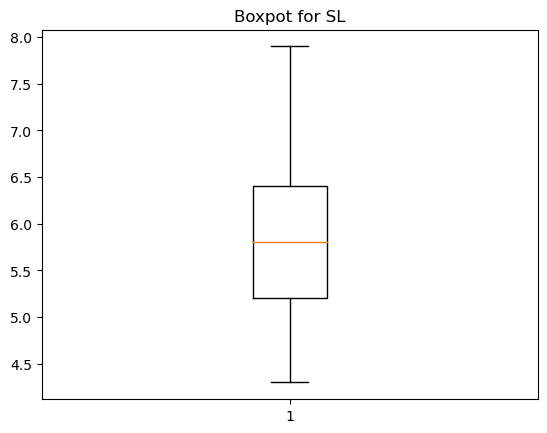

In [49]:
plt.boxplot(data1['SL'])
plt.title('Boxpot for SL')

In [50]:
#Find the outliers of SW
Q1 = np.percentile(data['SW'],25)

In [51]:
Q1

2.8

In [52]:
Q2 = np.percentile(data['SW'],50)

In [53]:
Q2

3.0

In [54]:
Q3 = np.percentile(data['SW'],75)

In [55]:
Q3

3.275

In [56]:
IQR = Q3 - Q1

In [57]:
IQR

0.4750000000000001

In [58]:
low_limit = Q1 -1.5*IQR
upr_lim =Q3+1.5*IQR

In [59]:
low_limit

2.0874999999999995

In [60]:
upr_lim

3.9875

In [61]:
outlier = []
for x in data['SW']:
    if((x>upr_lim)or(x<low_limit)):
        outlier.append(x)

In [62]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [63]:
x = data

In [64]:
#Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['Classification'] = label_encoder.fit_transform(x['Classification'])

In [65]:
x1 = x.drop('Classification',axis = 1)

In [66]:
from sklearn.preprocessing import normalize
x1 = normalize(x1)

In [67]:
type(x1)

numpy.ndarray

In [68]:
x1 = pd.DataFrame(x1)

In [69]:
x1.head()

,0,1,2,3
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.858812,0.473827,0.192492,0.029614
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


In [70]:
x = x.drop(['SL','SW','PL','PW'], axis =1)

In [71]:
x = pd.concat([x,x1], axis = 1)

In [72]:
x.columns = ['Classification','SL','SW','PL','PW']

In [73]:
x.head()

,Classification,SL,SW,PL,PW
0,0,0.803773,0.551609,0.220644,0.031521
1,0,0.828133,0.507020,0.236609,0.033801
2,0,0.858812,0.473827,0.192492,0.029614
3,0,0.800030,0.539151,0.260879,0.034784
4,0,0.790965,0.569495,0.221470,0.031639


In [74]:
#minmax scaling
from sklearn.preprocessing import MinMaxScaler
min_max =  MinMaxScaler(feature_range = (0,1))
x1 = min_max.fit_transform(x)

In [75]:
type(x1)

numpy.ndarray

In [76]:
x1 = pd.DataFrame(x1)

In [77]:
type(x1)

pandas.core.frame.DataFrame

In [78]:
x1

,0,1,2,3,4
0,0.0,0.750957,0.849441,0.112561,0.063208
1,0.0,0.857082,0.728517,0.146593,0.071793
2,0.0,0.990734,0.638498,0.052555,0.056033
3,0.0,0.734653,0.815655,0.198325,0.075491
4,0.0,0.695160,0.897948,0.114323,0.063653
...,...,...,...,...,...
145,1.0,0.392785,0.229688,0.835943,0.876849
146,1.0,0.428057,0.138727,0.876604,0.772802
147,1.0,0.537305,0.298171,0.718867,0.818609
148,1.0,0.188524,0.356868,0.894778,0.886568


In [79]:
x.columns

Index(['Classification', 'SL', 'SW', 'PL', 'PW'], dtype='object')

In [80]:
x.drop(['Classification', 'SL', 'SW', 'PL', 'PW'],axis = 1)

""
0
1
2
3
4
...
145
146
147
148


In [81]:
x=pd.concat([x,x1],axis =1)

In [82]:
x.head()

,Classification,SL,SW,PL,PW,0,1,2,3,4
0,0,0.803773,0.551609,0.220644,0.031521,0.0,0.750957,0.849441,0.112561,0.063208
1,0,0.828133,0.507020,0.236609,0.033801,0.0,0.857082,0.728517,0.146593,0.071793
2,0,0.858812,0.473827,0.192492,0.029614,0.0,0.990734,0.638498,0.052555,0.056033
3,0,0.800030,0.539151,0.260879,0.034784,0.0,0.734653,0.815655,0.198325,0.075491
4,0,0.790965,0.569495,0.221470,0.031639,0.0,0.695160,0.897948,0.114323,0.063653


<AxesSubplot:>

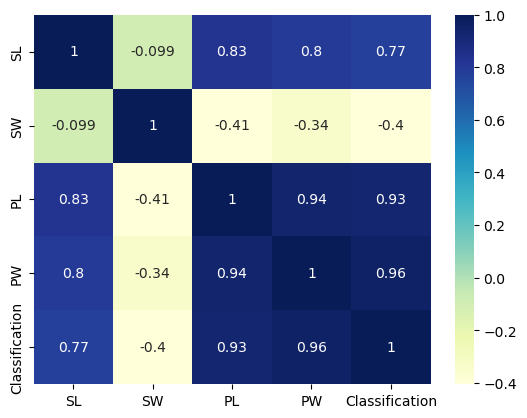

In [83]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True,cmap = 'YlGnBu')

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [89]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [90]:
#Linear regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(x_train,y_train)
predictions = model.predict(x_test)

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE = :',mean_squared_error(y_test,predictions))
print('R squared value = :',r2_score(y_test,predictions))

MSE = : 0.03674897628057208
R squared value = : 0.9474179989626155


In [ ]:
####Logic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
y_pred = log_model.predict(x_test)

In [94]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [95]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [96]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
###K Nearest Neighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
metric_k = []
neighbors = np.arange(3,15)

In [99]:
for k in neighbors:
    classifier =  KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_prediction = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

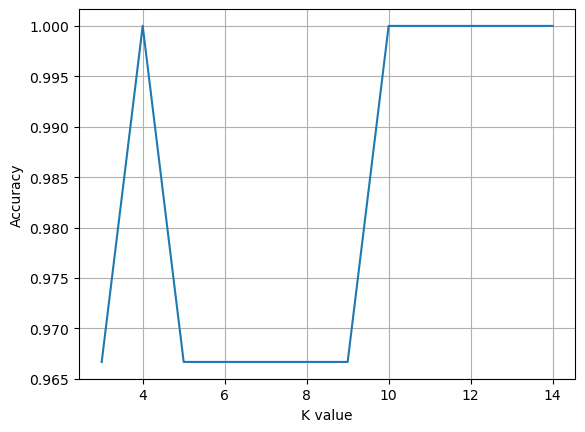

In [100]:
plt.plot(neighbors,metric_k)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [103]:
classifier = KNeighborsClassifier(n_neighbors=11, metric= 'euclidean')
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred_knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [104]:
accuracy_score(y_test,y_pred_knn)

1.0

In [105]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [ ]:
#####SVM Model

In [106]:
from sklearn.svm import SVC

In [111]:
svm_cls = SVC(kernel = 'linear')
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

In [112]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [113]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [119]:
accuracy_score(y_test,y_pred_dt)

1.0

In [120]:
####Decision tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train,y_train)
y_pred_dt = dt_cls.predict(x_test)

In [122]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [123]:
accuracy_score(y_test,y_pred_dt)

1.0

In [ ]:
###Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [125]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [126]:
accuracy_score(y_test,y_pred_rf)

1.0